# Think Stats 2 Chapter 4: Cumulative Distribution Functions

Think Stats 2 was written by Allen B. Downey

**The Question: Do first babies tend to be born late?**

In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import nsfg
import first
import thinkstats2
import thinkplot

pd.options.display.max_rows = 400
pd.options.display.max_columns = 244

## Binning

Useful when there are too many values to paint a clear picture with a PMF (like the example below).
- It means dividing the range of values into non-overlapping intervals ('bins'), and counting the number of values in each bin.
- While useful, it can be tricky to get the size of the bins right.
    - If they are big enough to sooth out the noise, they might also smooth out useful information

Firsts 4413 4363
Others 4735 4675


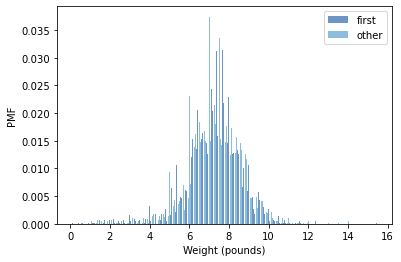

In [8]:
# Use Pmfs to plot the birth weights of first babies vs. others
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

## Percentile Rank & Percentile

As you can see in the above cell's output, there are just too many values to be able to tell the difference in birth weights between first babies and others.

Let's see how we could use Python to determine a percentile rank. As an example, if you are in the 90th percentile, you did as well as or better than 90% of the people who took the exam.

In [36]:
def PercentileRank(scores, your_score):
    """Takes a distribution of scores, and a single score, and returns the percentile rank of the given score."""
    
    count = 0
    for score in scores:
        if your_score >= score:
            count += 1
        
    percentile_rank = 100 * count / len(scores)
    return percentile_rank

# test against book example
scores = [55, 66, 77, 88, 99]
your_score = 77

p_rank = PercentileRank(scores, your_score)
p_rank

60.0

### Percentile

Going the other way (from percentile rank to percentile) is slightly harder.

In [29]:
def Percentile2(scores, p_rank):
    """Given scores & rank, returns the value of the given percentile rank."""
    scores.sort()
    # get the index of scores associated with that percentage
    index = p_rank * (len(scores) - 1) // 100
    return scores[index]

# test
Percentile2(scores, 43)

66

## CDFs (Cumulative Distribution functions)

The CDF is the function that maps from a value to its percentile rank.

It is almost identical to the PercentileRank function, but returns a value between 0-1 instead of 0-100.

In [34]:
def EvalCdf(sample, x):
    count = 0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [35]:
EvalCdf(scores, 77)

0.6

## Plotting and Reading CDFs

Okay, now let's plot a CDF for our NSFG's ``prglngth`` data.

In [38]:
live, firsts, others = first.MakeFrames()

In [40]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
cdf

Cdf([ 0  4  9 13 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 50], [1.09313511e-04 2.18627022e-04 3.27940533e-04 4.37254045e-04
 6.55881067e-04 7.65194578e-04 8.74508089e-04 9.83821600e-04
 1.20244862e-03 1.96764320e-03 2.07695671e-03 3.49803236e-03
 3.82597289e-03 7.65194578e-03 7.97988631e-03 1.14779187e-02
 1.37735024e-02 2.88587669e-02 3.18102317e-02 4.43812855e-02
 4.97376476e-02 5.62964582e-02 9.02929602e-02 1.25382597e-01
 1.75120245e-01 2.41473546e-01 7.54481854e-01 8.76475732e-01
 9.40642763e-01 9.76497595e-01 9.92675995e-01 9.97704416e-01
 9.98797551e-01 9.98906865e-01 9.99016178e-01 9.99781373e-01
 1.00000000e+00], 'prglngth')

In [41]:
# to get the probability of a certain value from a cdf
cdf.Prob(9)

0.00032794053344993443

In [43]:
# to get the value associated with a certain probability 
cdf.Value(9.99781373e-01)

50

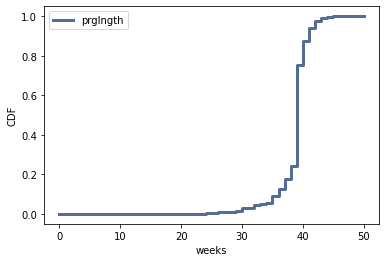

<Figure size 576x432 with 0 Axes>

In [45]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

To read the above, look at a certain week. At 35 weeks, you can see the percentile rank is about 0.1. At 40 weeks, the percentile jumps to about 0.8. That means that if a woman's pregnancy was 40 weeks, they're in the 80th percentile.

The sections with steep vertical leaps represent the most common values in the sample.

## Comparing CDFs

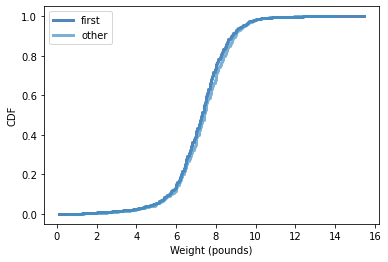

In [47]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

## Using CDFs to find....

**Interquartile range (IQR)**:
Used to measure the spread of a distribution. It equals the difference between the 75th and 25th percentiles.

In [57]:
iqr = cdf.Percentile(75) - cdf.Percentile(25)
iqr

0

Yes, the above output should be zero since there are so many ``prglngth`` = 39 weeks.

**The Median**: There are several ways to do this, but the easiest way using Cdfs is as follows:

In [58]:
cdf.Percentile(50)

39

So, the median pregnancy length for live babies is 39 weeks.

## Percentiles are often used to summarize the shape of a distribution.

Statistics like that represent equally-spaced points in a CDF are called **quantiles**.

For example, the distribution of income is often reported in **quintiles** (the split at 20th, 40th, 60th, and 80th percentiles).

The **interquartile range** is the difference between 75th and 25th percentile.

## Random numbers

Suppose we choose a random sample from the population of live births and look up the percentile rank of their birth weights. Now suppose we compute the CDF of the percentile ranks. What do you think the distribution will look like?

**Replacement**: A property of a sampling process. 'With Replacement' means that the same value can be chosen more than once. 'Without Replacement' means that once a value is chosen, it is removed from the population.

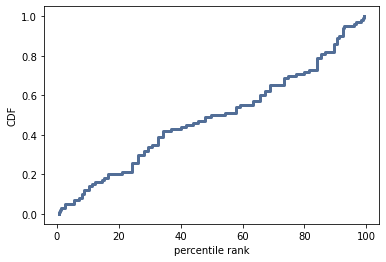

<Figure size 576x432 with 0 Axes>

In [67]:
# make cdf of birth weights
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

# generate a sample
sample = np.random.choice(weights, 100, replace=True)

# compute the percentile rank of each value in the sample
ranks = [cdf.PercentileRank(x) for x in sample]

# plot our findings
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

Why did we do that?

To show that the distribution of possible ranks is uniform (i.e. 40th percentile has CDF of 0.4, and so on). This is useful because it's the basis of a simple and efficient algorithm for generating random numbers with a given CDF.

## Comparing Percentile Ranks (Running example)

Foot race results are typically broken down by age & gender (for example, a 41 year old male would be classified as ``M4049``). 

Say you ranked 26th out of 256th of the ``M4049`` age group in a race. You can use this to derive how much slower you can excpect to be in 10 years.

In [73]:
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100 * beat / field_size
    return percentile


position = 26
field_size = 256
percentile = PositionToPercentile(position=position, field_size=field_size)
percentile

90.234375

Okay, so we're in the 90th percentile in this race at age 41. How do we find out what our speed would be in the M5059 group, assuming his percentile rank would be the same?

In [76]:
def PercentileToPosition(percentile, field_size):
    beat = field_size * percentile / 100
    position = field_size - beat + 1
    return position

field_size = 171

PercentileToPosition(percentile, field_size)

17.69921875

Alright, so with this new field size of 171 people that were in the M5059 group, we would have finished between 17th and 18th place. We can then just get the actual times for the people ranked as such to see at which speed we can expect to be running in ten years.